<a href="https://colab.research.google.com/github/Pallavisuma/CMPE257-Fall23-PallaviSuma-Kurmala/blob/take-home-exam/TakeHomeTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take Home Test

017353128

Took reference from Chat GPT

Task 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [4]:
train_data = pd.read_csv('/content/synthetic_dataset .csv')

In [6]:
test_data = pd.read_csv('synthetic_test_dataset.csv')

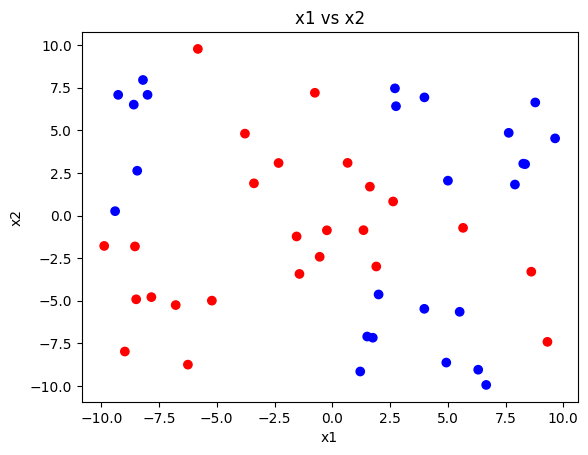

In [7]:
plt.scatter(train_data['x1'], train_data['x2'], c=train_data['y'].map({-1: 'red', 1: 'blue'}))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1 vs x2')
plt.show()

In [31]:
def weights(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

def predict(X, weights):
    return np.sign(np.dot(X, weights))

def Error(y_true, y_pred):
    return np.mean(y_true != y_pred)

def polynomial_tranforms(x1,x2, order):
    if(order ==1):
        return np.vstack((x1, x2, np.ones_like(x1))).T
    elif order == 2:
        return np.vstack((x1**2, x2**2, x1*x2, x1, x2, np.ones_like(x1))).T
    elif order == 3:
        return np.vstack((x1**3, x2**3, x1**2*x2, x1*x2**2, x1**2, x2**2, x1*x2, x1, x2, np.ones_like(x1))).T
    elif order == 4:
        return np.vstack((x1**4, x2**4, x1**3*x2, x1**2*x2**2, x1*x2**3, x1**3, x2**3, x1**2*x2, x1*x2**2, x1**2, x2**2, x1*x2, x1, x2, np.ones_like(x1))).T






In [11]:
x1, x2, y = train_data['x1'].values, train_data['x2'].values, train_data['y'].values
testX1, testX2, testY = test_data['x1'].values, test_data['x2'].values, test_data['y'].values

Training

In [26]:
X_linear = polynomial_tranforms(x1, x2 ,1)

weights_linear = weights(X_linear, y)

test_predictions_linear = predict(X_linear, weights_linear)

train_error_linear = Error(y, test_predictions_linear)
print(f"train_error_linear: {train_error_linear}")

# Calculating the test error with no feature tranforms
testX_linear = polynomial_tranforms(testX1, testX2,1)

test_predictions_linear = predict(testX_linear, weights_linear)

test_error_linear = Error(testY, test_predictions_linear)
print(f"validation_error_linear: {test_error_linear}")

train_error_linear: 0.4
validation_error_linear: 0.41


In [32]:

X_quad= polynomial_tranforms(x1, x2,2)

weights_quad =  weights(X_quad, y)

predictions_quad = predict(X_quad, weights_quad)

train_error_quad = Error(y, predictions_quad)
print(f"train_error_quad: {train_error_quad}")

# Calculating the validation error with quadratic feature tranforms
testX_quad= polynomial_tranforms(testX1, testX2,2)

test_predictions_quad = predict(testX_quad, weights_quad)

test_error_quad = Error(testY, test_predictions_quad)
print(f"validation_error_quad: {test_error_quad}")


train_error_quad: 0.22
validation_error_quad: 0.278


Training with  3rd and 4rth order Polynomial

In [35]:
X_3rd= polynomial_tranforms(x1, x2,3)

weights_3rd=  weights(X_3rd, y)

predictions_3rd = predict(X_3rd, weights_3rd)

train_error_3rd = Error(y, predictions_3rd)
print(f"train_error_quad: {train_error_3rd}")

# Calculating the validation error with quadratic feature tranforms
testX_3rd = polynomial_tranforms(testX1, testX2,3)

test_predictions_3rd = predict(testX_3rd, weights_3rd)

test_error_3rd = Error(testY, test_predictions_3rd)
print(f"validation_error_quad: {test_error_3rd}")


train_error_quad: 0.04
validation_error_quad: 0.198


In [36]:

X_4rth= polynomial_tranforms(x1, x2,4)

weights_4rth =  weights(X_4rth, y)

predictions_4rth= predict(X_4rth, weights_4rth)
train_error_4rth = Error(y, predictions_4rth)
print(f"train_error_quad: {train_error_4rth}")

# Calculating the validation error with quadratic feature tranforms
testX_4rth = polynomial_tranforms(testX1, testX2,4)

test_predictions_4rth = predict(testX_4rth, weights_4rth)

test_error_4rth = Error(testY, test_predictions_4rth)
print(f"validation_error_quad: {test_error_4rth}")

train_error_quad: 0.02
validation_error_quad: 0.204


In [38]:
feature_transform =['linear', 'quad', 'cubic', 'fourth']
train_errors = [train_error_linear, train_error_quad,train_error_3rd, train_error_4rth]
validation_errors = [test_error_linear,test_error_quad, test_error_3rd,  test_error_4rth]

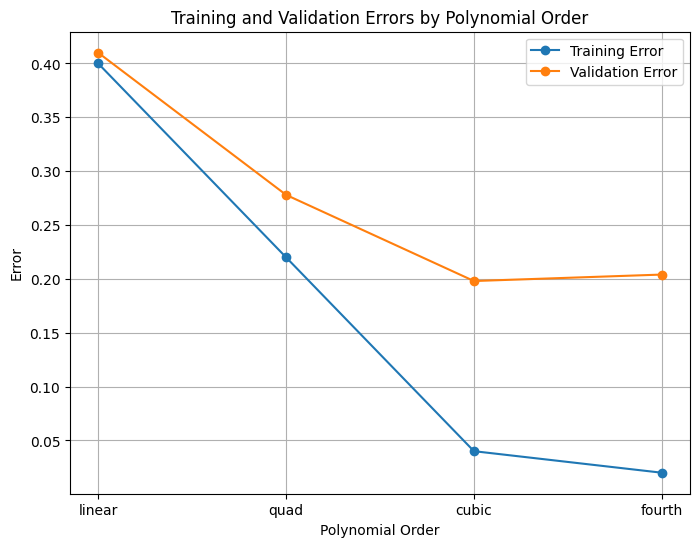

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(feature_transform, train_errors, marker='o', label='Training Error')
plt.plot(feature_transform, validation_errors, marker='o', label='Validation Error')
plt.title('Training and Validation Errors by Polynomial Order')
plt.xlabel('Polynomial Order')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


- As model complexity increases, training errors consistently decrease, indicating better data fitting.
-  Validation errors decrease until the cubic transformation and then increase slightly for the fourth-order transformation.
-  The increase in model complexity beyond the cubic transformation appears to lead to overfitting, as evidenced by the rise in validation error.


- Of the available options, the cubic transformation appears to strike a good balance between minimising training and validation errors.
- It appears to generalise well to previously unseen data (lower validation error) while retaining essential features (low training error).
- The fourth-order transformation may be slightly overfitting the training data, as evidenced by a slightly higher validation error despite a lower training error.

As a result of this analysis, the cubic transformation appears to provide the best balance between fitting the data and generalising to new, unseen data points.

Task 2

In [41]:
cancer_data=pd.read_csv('/content/breast_cancer_dataset_preprocessed.csv')


In [43]:
cancer_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,4.147954,-4.443183,-0.068966,4.035033,0.817574,-0.476277,0.553593,1.268819,M
1,-4.595154,-2.684882,1.084110,-0.403925,0.410287,0.687051,0.284184,0.260968,B
2,-0.755349,-2.318373,-1.938275,0.279953,0.241712,3.409801,0.092694,1.040391,M
3,-0.453863,0.197572,-1.037060,0.344384,0.070598,-0.822546,-0.993352,-0.946259,B
4,-3.278680,-0.792025,-0.736833,-1.621295,-0.085459,-0.824324,-0.107042,-0.291755,B


In [44]:
cancer_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8
count,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02
mean,4.662354e-18,2.797412e-17,-1.631824e-17,-2.797412e-17,-2.797412e-17,-9.324708e-18,4.662354e-18,9.324708e-18
std,3.621316e+00,2.384647e+00,1.734338e+00,1.429617e+00,1.287268e+00,1.081252e+00,8.255491e-01,6.943847e-01
min,-5.508773e+00,-7.715905e+00,-4.493143e+00,-4.123493e+00,-4.905151e+00,-4.173706e+00,-3.651191e+00,-3.023013e+00
25%,-2.742047e+00,-1.477377e+00,-1.037060e+00,-9.484575e-01,-6.733832e-01,-7.036125e-01,-4.657817e-01,-3.591851e-01
50%,-1.110688e+00,-1.824313e-01,-1.804973e-01,-6.289660e-02,-5.918051e-02,-1.078260e-01,-5.509302e-03,1.888426e-02
75%,2.528431e+00,1.238930e+00,8.892163e-01,7.023924e-01,6.294085e-01,5.992903e-01,4.462397e-01,3.551078e-01
max,1.574861e+01,1.264984e+01,9.743745e+00,5.241572e+00,6.377598e+00,4.961734e+00,5.032409e+00,4.207317e+00


In [46]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical target variable
label_encoder = LabelEncoder()
cancer_data['y_encoded'] = label_encoder.fit_transform(cancer_data['y'])

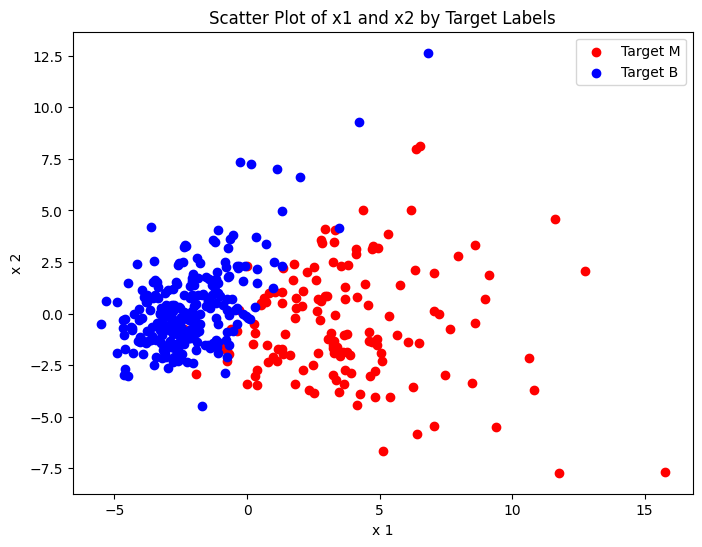

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
X = cancer_data.drop('y', axis=1)  # Features
y = cancer_data['y']  # Target labels
plt.figure(figsize=(8, 6))
color_map = {'M': 'red', 'B': 'blue'}
for target_label, color in color_map.items():
    plt.scatter(X[y == target_label].iloc[:, 0], X[y == target_label].iloc[:, 1],
                color=color, label=f"Target {target_label}")
plt.title('Scatter Plot of x1 and x2 by Target Labels')
plt.xlabel('x 1')
plt.ylabel('x 2')
plt.legend()
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

X = cancer_data.drop(['y', 'y_encoded'], axis=1)
y = cancer_data['y_encoded']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Perceptron': Perceptron(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

In [51]:
# Specify hyperparameters for each model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Perceptron': Perceptron(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

params = {
    'Perceptron': {'max_iter': [100, 500, 1000], 'eta0': [0.1, 0.01, 0.001]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10, 15]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'XGBoost': {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
}

results = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, params[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    best_params = grid_search.best_params_

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results[model_name] = {
        'Best Model': best_model,
        'Best Parameters': best_params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }



In [52]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Best_Params: {metrics['Best Parameters']}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print(f"ROC AUC: {metrics['ROC AUC']}")
    print("------------------------")


Model: Perceptron
Best_Params: {'eta0': 0.001, 'max_iter': 100}
Accuracy: 0.974025974025974
Precision: 0.9583333333333334
Recall: 0.9583333333333334
F1 Score: 0.9583333333333334
ROC AUC: 0.9697327044025158
------------------------
Model: Logistic Regression
Best_Params: {'C': 10}
Accuracy: 0.974025974025974
Precision: 0.9583333333333334
Recall: 0.9583333333333334
F1 Score: 0.9583333333333334
ROC AUC: 0.9697327044025158
------------------------
Model: Decision Tree
Best_Params: {'max_depth': None}
Accuracy: 0.961038961038961
Precision: 0.8888888888888888
Recall: 1.0
F1 Score: 0.9411764705882353
ROC AUC: 0.9716981132075472
------------------------
Model: Random Forest
Best_Params: {'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.987012987012987
Precision: 0.96
Recall: 1.0
F1 Score: 0.9795918367346939
ROC AUC: 0.9905660377358491
------------------------
Model: Support Vector Machine
Best_Params: {'C': 1, 'gamma': 'scale'}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.

A model that balances precision and recall is ideal for task-related health data, particularly cancer detection, where both false negatives and false positives have significant implications.The balance between them results in a higher F1 score.

In my case, K Nearest Neighbours and Logistic Regression have 100% precision, which means they had no false positives out of all the models I compared! However, because this is a medical problem, false positives weigh less than false negatives.**Support Vector Machine** has a higher F1 score, implying fewer false positives and false negatives, proving it to be superior to others. So I'd use Support Vector Machine (SVM) with the parameters 'C': 10, 'gamma':'scale'.
